In [113]:
%matplotlib inline

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from IPython.display import display

# Investigation of the Stroop Effect

<H3>Background Information</H3>
<p></p>
In a Stroop task, participants are presented with a list of words, with each word displayed in a colour of ink. The participant’s task is to say out loud the colour of the ink in which the word is printed. 

The task has two conditions: a congruent words condition, and an incongruent words condition. 

In the congruent words condition, the words being displayed are colour words whose names match the colours in which they are printed: for example:  
<b style="color:#FF0000";>RED</b>,
<b style="color:blue";>BLUE</b> 
<b style="color:green";>GREEN</b> 
<b style="color:purple";>PURPLE</b>

In the incongruent words condition, the words displayed are colour words whose names do not match the colours in which they are printed: for example 
<b style="color:blue";>RED</b>,
<b style="color:#FF0000";>BLUE</b> 
<b style="color:green";>PURPLE</b> 
<b style="color:purple";>GREEN</b>
Green Red Blue
Purple Blue Purple

In each case, we measure the time it takes to name the ink colours in equally-sized lists. 

Each participant will go through and record a time from each condition.

<h3>1. What is our independent variable? What is our dependent variable?</h3>

The independent variable is whether the task has the congruent or incongruent condition. In otherwords we want to determine if changing the colour of the words is a potential reason for variation

The dependent variable is the time taken to complete each test, as it represents the output of the variation being studied. 

<h3>2a.	What is an appropriate set of hypotheses for this task?</h3>

<b>What is the Stroop Effect?</b>
<br>According to Wikipedia<blockquote cite=="https://en.wikipedia.org/wiki/Stroop_effect">
<i>"It is a demonstration of interference in the reaction time of a task. When the name of a color (e.g., "blue", "green", or "red") is printed in a color that is not denoted by the name (e.g., the word "red" printed in blue ink instead of red ink), naming the color of the word takes longer and is more prone to errors than when the color of the ink matches the name of the color." </blockquote>

<br><b>What is the explanatory Hypothesis?</b>
The reaction time for naming the ink colours that are not matching of the written names of colours (incogruent) will be different than the reaction time for naming the ink colours that match the written names (congruent)


<br><b>How are we to go about this? </b>
<br>When performning our Hypothesis test we are referring to the population means of Congruent and InCongruent test results. However, due our small samle size of 24 participants it is not posible to perform the Hypothesis on a population data set; so we must make inference of the population means from our Sample means (X&#772;c = Congruent Mean and X&#772;i = InConguent Mean) sets using Statistical Tools.

To achieve this, we will use a two-sided paired paticipant T-test to verify. The reasoning for this is:
<ul>
<li>to address the uncertainty that comes from the sample standardard error associated with using a sample to emulate population standard deviation.</li> 
<li>Compare the means of two dependant sample groups</li>
</ul>

<p><b>Null Hypothesis:</b> 
<p>The null hypothesis H0 claims that there is no significant difference in the Population Average Response time taken completing the ComCongruent Test(μc)and Incongruent Test(μI)



<p><b>Alternative Hypothesis:</b> 
<p>The alternative hypothesis claims that there is significant differenct, positive or negative in the Population Average Response time taken completing the ComCongruent Test(μc)and Incongruent Test(μI)
<p><i> Ha:  μi - μc ≠ 0</i>

<h3>2b. What kind of statistical test do you expect to perform? </h3>
<br>We will use a two tailed Dependant Samples T-Test aka Paired Sample .
<br><br>Justification:
<li>the same participants carried out both the congruent and incongruent tests
<li>Due to the nature of the Stroop test there will be minimal carry over effects and minimal importance weighed on the order in which the Congruent and Incongruent Tests are performed
<li>we dont have population parameters to use a Z-Test

<H3>3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.</h3>


In [115]:
# Import dataset into dataframe and provide sample from data frame
stroop_results = pd.read_csv('./stroop_Test.csv')
# Import each test into their own dataframe
congruent_df = stroop_results['congruent']
incongruent_df = stroop_results['Incongruent']

<h4>Central Tendency Measures</h4>

In [116]:
# Identify the Mean
Xc = congruent_df.mean(); round(Xc,4)
Xi = incongruent_df.mean(); round(Xi,4)

print 'Congruent Mean = '+ str(Xc)
print 'Incongruent Mean = '+ str(Xc)

Congruent Mean = 14.051125
Incongruent Mean = 14.051125


In [117]:
# Identify the Median
Median_c = congruent_df.median(); round(Median_c,4)
Median_i = incongruent_df.median(); round(Median_i,4)

print 'Congruent Median = '+ str(Median_c)
print 'Incongruent Median = '+ str(Median_i)

Congruent Median = 14.3565
Incongruent Median = 21.0175


<b>Variability Measures</b>

In [118]:
# Identify the Range
print (stroop_results.max(axis=0) - stroop_results.min(axis=0))

congruent      13.698
Incongruent    19.568
dtype: float64


In [119]:
# Identify the Sample Variance
print (stroop_results.var(axis=0))

congruent      12.669029
Incongruent    23.011757
dtype: float64


In [120]:
# Identify Standard Deviation
stdd_c = congruent_df.std(); round(stdd_c,4);
stdd_i = incongruent_df.std(); round(stdd_i,4);

print 'Congruent Median = '+ str(stdd_c)
print 'Incongruent Median = '+ str(stdd_i)

Congruent Median = 3.55935795765
Incongruent Median = 4.79705712247


<h3>4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.</h3>


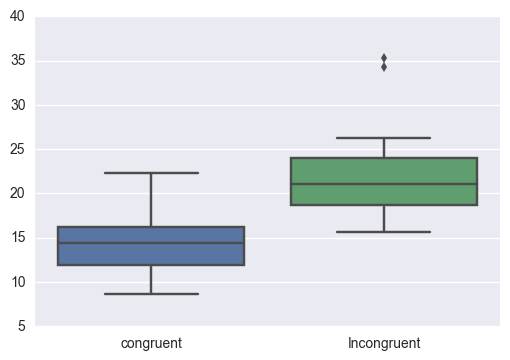

In [121]:
# Create Box Plot to visuallyy identify deviations and outliers
# Y-Axis Represents the time taken in the Test
ax = sns.boxplot(data=stroop_results)

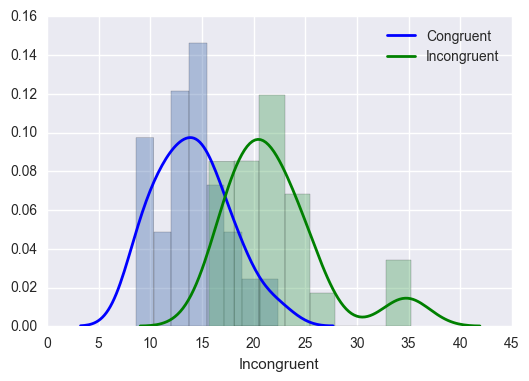

In [122]:
sns.distplot(x, bins=8, kde_kws={"color": "b", "lw": 2, "label": "Congruent"}); 
sns.distplot(y, bins=8, kde_kws={"color": "g", "lw": 2, "label": "Incongruent"},); 
#Refer to the Blue Distribution plot for Congruent Results
#Refer to the bar Distribution plot for InCongruent Results

<H3>Findings from Visualisation</H3>

<b>The boxplot shows us that:</b>
<li>the Congruent and Incongruent Sample groups have significant difference in median times and range. </li>
<li>that Incongruent words test results are of much longer times than congruent.</li>
<li>Both Congruent and Incongruent sample group have suspected outliers; with Incongruent sample group having the more significant outliers (see the black dots well above the inner fence around the 35 mark on the y-axis). </li>

<p>
<b>The histograms:</b>
<li>confirms the previous observations of the box plot. </li>
<li>Incongruent Test data looks to have a positive skew; with a slight sign of being biomodel due to 2 outlier scores. These small outliers may give justificaiton for requesting a larger sample size to obtain a more normal distribution ie a single bell curve.
</li>
</p>

<p>
<b>Summary: </b>
<br>Both data sets appear to have a normal enough distribution to allow for a Paired Sample T-test aka dependent sample t-test to determine whether the mean difference between two sets of observations is zero. 
</p>


<h3>5. Now, perform the statistical test and report your results. 

<b>Confidence Level</b>
<br>We will apply the default confidence level of <b>95%</b>. 
<br>This will imply that that 95% of the confidence intervals would include the true population parameter.

<b>Significance level (α)</b>
<br> As we are using two sided test our significance level will be <b>α=0.025</b> on either side of the distribution.
<br>ie 1 - .95 confidence level divided by 2. 

<b>Degrees of Freedom (df = N-1)</b>
<br> <b>df = 24 </b>
<br> For t distribution to compute a confidence interval for a mean score we must deduct one from the sample size to allow for sampling error that can occuring when estimating population parameters.

<b>Critical Value </b>
<br> When using a T-Table to identify our Critical value using the α=0.025 and df=24 we obtain a <b>T-Critical Value = 2.064</b>

<b>Point Estimate in Seconds</b>
<br>PE = X̄i - X̄c

In [123]:
PE = Xi - Xc;
print 'PE = '+str(round(PE,4));

PE = 7.9648


<function round>

<br><b>Critical Value of two sided T-Test</b>
<br> When using <a href="https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg">T-Table</a> to identify our Critical value using the α=0.025 and df=24 we obtain a <b>T-Critical Value = -2.064 and +2.064</b>
<p>
Alternatively we can arrive at the same T Critical Value using the Scripy fuction ppf as seen below
<p><b>Rejection Region</b>
<br>-2.04 > t statistic > 2.04

In [124]:
stats.t.ppf(.025, 24)
#t-critical value for two sided test will have

-2.063898561628021

<h3>Calculate T-Statistic</h3>
<p> We define by 
<p><i>t = PE / [ s / sqrt( n ) ]</i></p>

<ul>
<i>
<li>PE is the point estimate ie μi - μc; the difference betweent the sample means. 
<li>s is the standard deviation of the sample <br>s = sqrt [ Σ ( xi - x )2 / ( n - 1 ) ]
<li>n is the sample size
</i>
</ul>

Alternatively we can identify the T-Statistic along with the P Value using the Scripy function <i><b>ttest_rel(sample a, sample b)</b></i> against the Congruent and Incongruent Sample dataframes recorded earlier. The output of this is below. 

In [162]:
#Step 1 - Identify Sample Difference
#df['D'] = df['Incongruent'] - df['Congruent']
#print df['D'] 
stroop_results['difference'] = stroop_results['Incongruent'] - stroop_results['congruent']

#Step 2 - Identify the sample difference from the mean SDM Squared
stroop_results['SMPL_DFNC_MEAN_SQRD'] = (stroop_results['difference'] - stroop_results['difference'].mean())**2

#Step 3 - Sum the squared differences
SUM_SQRD_DIFF = stroop_results['SMPL_DFNC_MEAN_SQRD'].sum()

#Step 4 - Calculate the Variance - Sum of Squared Deviation / (sample size - 1)
Variance = SUM_SQRD_DIFF /(24-1)

#Step 5 - Calculate the Stamdard Deviation from the Sample Mean by taking 
# the square root of sample variance
s = math.sqrt(Variance)

print 'Standard Deviation from the Sample mean = '+str(round(s,4))

Standard Deviation from the Sample mean = 4.8648


In [167]:
# Step 6 - Calcuate the T-Statistic using formula:
# t = PE/(s/√n)
# t = PE / (s/SQRT(24))

tstat = PE / (s/math.sqrt(24))
print 'T-Statistic = '+str(round(tstat,4))

T-Statistic = 8.0207


<H4>What is the P-Value</H4>

In [169]:
pvalue = stats.t.cdf(x= 8.0207,      # T-test statistic
               df= 23) * 2   # Mupltiply by two for two tailed test
print 'P-value = '+ str(round(pvalue,4))

P-value = 2.0


<h3>Do you reject the null hypothesis or fail to reject it? </h3>
<br> Yes, we reject the Null Hypothesis for the reasons that: 
<li>The T-Statistic (8.0207) resides inthe Rejection region of the distribution as it is signficantly greater thant the T-Critcal Value (2.064).
<li>The P-value is greater than the Standard Deviation of the Sample  ie 2.0 > 4.8648.



<H3>What is the Margin for Error within the sample data?</H3>
<i>We calculate the margin of error for the reason that it expresses the maximum expected difference between the population parameter and a sample estimate of that parameter.</i>

In [176]:
#STEP 1 - Calculates the Standard Error of Mean
# SEM = S / SQRT(n)
SEM = s / np.sqrt(24)
#print 'Standard Error of the Mean = '+str(SEM)

# STEP 2 Calculates the Margin for Error
# The margin of error expresses the maximum expected difference between the true population parameter and a sample estimate of that parameter. 
# Critical value * Standard Error of Mean
Margin_for_Error = 2.064 * SEM
print 'Margin_for_Error = '+ str(Margin_for_Error)

Margin_for_Error = 2.04961110218


<b>What does this Margin of Error Mean</b>
<br>It means we can be 95% confident that the mean time taken in the True population lies somewhere between 7.9648-0.2479 seconds and 7.9648+0.2479  seconds

<h3>Conclusion</h3> 

At α=0.05 (.025 for both sides) of a two tailed t-test, we conclude that, on average there is a statistically significant difference in the time taken to name the ink colours under both conditions. 

<b>Did the results match up with your expectations?</b>

The results matched the expectation that we'd be able to Reject the Null Hypotheses and accept the Alternative Hypothesis that the Congruenet Test when applied to the entire population will take a different time to the Inconguent Test applied to the same population.

<b>REFERENCES:</b>
<ul>
<li>http://hamelg.blogspot.com.au/2015/11/python-for-data-analysis-part-24.html</li>
<li>http://stattrek.com/statistics/dictionary</li>
<li>https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel</li>
<li> https://plot.ly/matplotlib/bar-charts/</li>
<li> https://docs.python.org/2/library/math.html</li>
<li>https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html</li>
<li>http://hamelg.blogspot.com.au/2015/11/python-for-data-analysis-part-24.html</li>
<li>http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html</li>
<li>http://seaborn.pydata.org/generated/seaborn.boxplot.html</li>
</ul>